In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

In [1]:
import pandas as pd

In [47]:
import scipy.stats as st

In [62]:
import math

In [20]:
df = pd.read_fwf("../data/lalonde_experimental.txt", header = None, colspecs=[(0, 10), (10, 20)])

In [21]:
df.columns = ['W', 'Y']

In [ ]:
df['W'] = df['W'].apply(int)

### Question 1

a)

Using the t-statitic

In [53]:
N = df.shape[0]
M = df['W'].sum()

In [54]:
Y_1 = df[df.W == 1]['Y'].mean()
Y_0 = df[df.W == 0]['Y'].mean()

##### Computing the unbiased variance

In [55]:
s2_0 = df[df.W == 1]['Y'].var()
s2_1 = df[df.W == 1]['Y'].var()

##### Computing the variance of the difference of means

In [56]:
s2_dif = s2_0/(N - M) + s2_1/M

##### T-statistic

In [57]:
t_statistic = (Y_1 - Y_0)/(s2_dif ** 0.5)

In [58]:
p_value = 2 * (1 - st.norm.cdf(t_statistic))

In [59]:
print(f"Y_0 is {Y_0:.2f}, Y_1 is {Y_1:.2f}, the difference is {Y_1 - Y_0:.2f} and the t-statistic is {t_statistic:.6f} and the p-value is {p_value:.6f}")


Y_0 is 4.55, Y_1 is 6.35, the difference is 1.79 and the t-statistic is 2.371190 and the p-value is 0.017731


b)

##### Set K (number of draws)


In [182]:
#K = 1000000
K = 1000000

##### Under the null, both Y_0 and Y_1 are equal

In [183]:
# The set of assignment vector is comprised by N choose M, I set the universe of potential assignment

In [184]:
math.comb(N,M)

6083152392753576912837559233248532391555730573702937346458256906836883923573725070493581203256191523614142569625942938291437491993

Truly unfesiable to compute, using the approach of choosing directly

In [185]:
import numpy as np

In [186]:
stat_observed = Y_1 - Y_0

In [187]:
stat_observed

1.794341237006238

In [188]:
df['Y_1'] = df['Y'] 
df['Y_0'] = df['Y'] 

In [189]:
stat_distribution = []
# Draw a vector of assignments and compute the statistic
for i in range(K):
    W_c = np.random.choice(range(N), size = M, replace = False)
    stat_draw = df.loc[W_c]['Y_1'].mean() - df.drop(W_c)['Y_0'].mean()
    stat_distribution.append(stat_draw)

stat_distribution = np.array(stat_distribution)

In [195]:
p_value_exact = np.sum(abs(stat_distribution) > abs(stat_observed))/K

In [196]:
print(p_value_exact)

0.0052


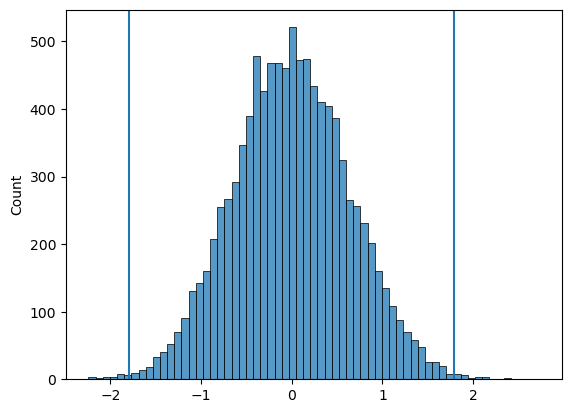

In [194]:
sns.histplot(stat_distribution)
plt.axvline(-stat_observed)
plt.axvline(stat_observed)

c)

Foreach observation compute the rank

In [197]:
df['R'] = df['Y'].apply(lambda y: (df['Y'] < y).sum() + 0.5 * (1 + (df['Y'] == y).sum()) - (N + 1)/2)

##### Checking it has mean zero

In [200]:
df['R'].mean()

0.0

Under the null, the ranks shouldn't change

In [205]:
df['R_0'] = df['R'] 
df['R_1'] = df['R'] 

In [206]:
stat_observed = df[df.W == 1]['R'].mean() - df[df.W == 0]['R'].mean()

In [207]:
stat_observed

31.01585239085239

In [208]:
stat_distribution = []
# Draw a vector of assignments and compute the statistic
for i in range(K):
    W_c = np.random.choice(range(N), size = M, replace = False)
    stat_draw = df.loc[W_c]['R_1'].mean() - df.drop(W_c)['R_0'].mean()
    stat_distribution.append(stat_draw)

stat_distribution = np.array(stat_distribution)

In [209]:
p_value_exact = np.sum(abs(stat_distribution) > abs(stat_observed))/K

In [210]:
print(p_value_exact)

0.0099


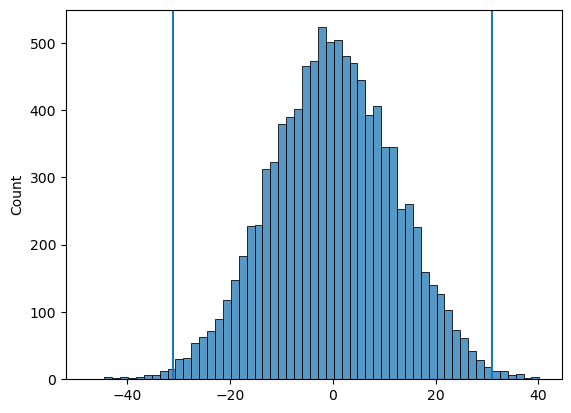

In [211]:
sns.histplot(stat_distribution)
plt.axvline(-stat_observed)
plt.axvline(stat_observed)